In [12]:
import pandas as pd
import numpy as np

In [2]:
from sklearn.ensemble import GradientBoostingClassifier

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
from sklearn.metrics import log_loss

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
data = pd.read_csv('_75fb7a1b6f3431b6217cdbcba2fd30b9_gbm-data.csv')

In [7]:
target = data['Activity'].values

In [8]:
data = data.drop(['Activity'], axis=1).values

In [9]:
X_train, X_test, y_train, y_test = train_test_split(data, target, 
                                      test_size=0.8, 
                                      random_state=241)

      Iter       Train Loss   Remaining Time 
         1           1.0190           16.68s
         2           0.9192           15.86s
         3           0.8272           14.72s
         4           0.7834           14.41s
         5           0.7109           14.11s
         6           0.6368           14.13s
         7           0.5797           13.94s
         8           0.5610           13.62s
         9           0.5185           13.65s
        10           0.4984           13.79s
        20           0.1999           14.99s
        30           0.1313           13.82s
        40           0.0790           12.70s
        50           0.0511           11.86s
        60           0.0352           11.08s
        70           0.0245           10.69s
        80           0.0162            9.97s
        90           0.0114            9.23s
       100           0.0077            8.65s
       200           0.0004            2.66s
1.3692143923356304
0.5822942594278475


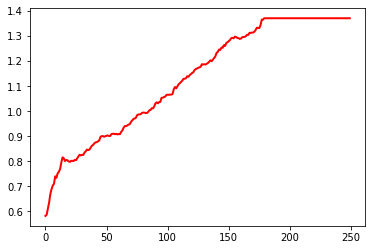

      Iter       Train Loss   Remaining Time 
         1           1.1255           15.10s
         2           1.0035           15.12s
         3           0.9386           15.31s
         4           0.8844           14.63s
         5           0.8381           14.30s
         6           0.7995           13.82s
         7           0.7559           13.81s
         8           0.7205           13.76s
         9           0.6958           13.96s
        10           0.6725           13.78s
        20           0.4672           13.70s
        30           0.3179           13.32s
        40           0.2274           13.73s
        50           0.1774           13.08s
        60           0.1394           12.21s
        70           0.1050           11.41s
        80           0.0805           10.75s
        90           0.0650           10.06s
       100           0.0511            9.40s
       200           0.0058            2.91s
1.0046672135914019
0.5560965876181979


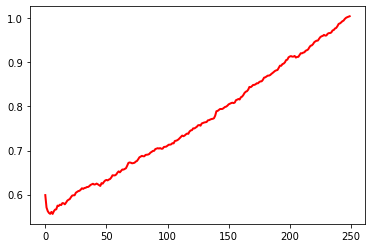

      Iter       Train Loss   Remaining Time 
         1           1.2095           16.13s
         2           1.1006           15.72s
         3           1.0240           15.59s
         4           0.9729           15.90s
         5           0.9387           15.15s
         6           0.8948           15.13s
         7           0.8621           14.78s
         8           0.8360           14.47s
         9           0.8171           14.15s
        10           0.7883           13.97s
        20           0.6164           12.48s
        30           0.4933           11.76s
        40           0.4248           10.95s
        50           0.3345           10.45s
        60           0.2760            9.89s
        70           0.2263            9.38s
        80           0.1971            8.79s
        90           0.1693            8.26s
       100           0.1388            7.78s
       200           0.0294            2.57s
0.7937713772999462
0.5432596932316428


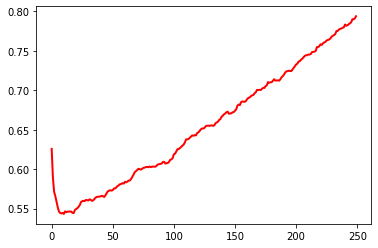

      Iter       Train Loss   Remaining Time 
         1           1.2613           15.11s
         2           1.1715           15.17s
         3           1.1009           15.07s
         4           1.0529           15.41s
         5           1.0130           15.67s
         6           0.9740           15.46s
         7           0.9475           14.83s
         8           0.9197           14.90s
         9           0.8979           14.73s
        10           0.8730           14.60s
        20           0.7207           13.96s
        30           0.6055           12.76s
        40           0.5244           12.11s
        50           0.4501           11.49s
        60           0.3908           11.21s
        70           0.3372           10.60s
        80           0.3009            9.89s
        90           0.2603            9.37s
       100           0.2327            8.73s
       200           0.0835            2.84s
0.6576776650423739
36
0.5314949511258739


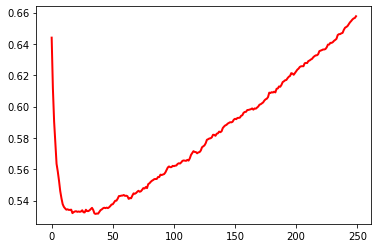

      Iter       Train Loss   Remaining Time 
         1           1.3199           15.64s
         2           1.2645           15.32s
         3           1.2170           15.11s
         4           1.1775           15.44s
         5           1.1404           15.28s
         6           1.1106           15.15s
         7           1.0844           15.02s
         8           1.0617           15.08s
         9           1.0411           15.09s
        10           1.0223           14.96s
        20           0.8864           13.65s
        30           0.7844           12.49s
        40           0.7176           11.62s
        50           0.6590           10.87s
        60           0.6120           10.23s
        70           0.5599            9.64s
        80           0.5242            9.03s
        90           0.4829            8.47s
       100           0.4473            7.92s
       200           0.2379            2.62s
0.6656662128911628
0.5254924770369842


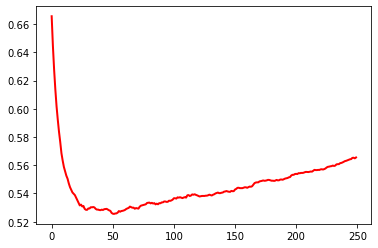

In [16]:
learning_rate = [1, 0.5, 0.3, 0.2, 0.1]
for i in range(5):
    model = GradientBoostingClassifier(n_estimators=250, verbose=True, random_state=241, 
                                       learning_rate=learning_rate[i])
    model.fit(X_train, y_train)
    
    test_loss = np.empty(250)
    
    y_pred = model.predict(X_test)
    
    for iter_, y_pred in enumerate(model.staged_decision_function(X_test)):
        y_pred_test = 1.0/(1.0 + np.exp(-y_pred))
        test_loss[iter_] = log_loss(y_test, y_pred_test)
        
    print(test_loss.max())
    if learning_rate[i]==0.2:
        print(min(range(len(test_loss)), key=test_loss.__getitem__))
    print(test_loss.min())

    plt.figure()
    plt.plot(test_loss, 'r', linewidth=2)
    plt.show()

In [18]:
model = GradientBoostingClassifier(n_estimators=36, verbose=True, random_state=241)
model.fit(X_train, y_train)

test_loss = np.empty(36)

y_pred = model.predict_proba(X_test)

print(log_loss(y_test, y_pred))

      Iter       Train Loss   Remaining Time 
         1           1.3199            4.30s
         2           1.2645            4.40s
         3           1.2170            4.17s
         4           1.1775            4.09s
         5           1.1404            4.04s
         6           1.1106            4.03s
         7           1.0844            4.18s
         8           1.0617            4.02s
         9           1.0411            3.89s
        10           1.0223            3.74s
        20           0.8864            2.27s
        30           0.7844            0.80s
0.530072698085972
